**Subject:** Machine and Deep Learning 2023

*  **Project:** Skin classification: Deep Learning approach
*  **Authors:** Xavier Beltran, Clara Lisazo, Luisana Alvarez
*  **Comments:** This is the document utilised for training the neural network that yielded the highest accuracy. The remaining neural network files presented in this project will not be included, as their code structure is identical, with the only variation being the name of the pre-trained model.





Firstly, we import all the needed libraries to implement this approach.

In [1]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.inception_resnet_v2 import preprocess_input
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import accuracy_score
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import multilabel_confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Then, we read the images from the directory. 

**Specifications:**
*   The samples are divided into 70% train and 30% test. 

*   The 70% of train is divided into 70% for train and 30% for validation.

* To deal with the imbalance data, data augmentation has been carried out, in previous steps. This data augmentation consisted of applying various augmentations, such as rotating or inverting the image, until the number of samples from each class was nearly identical. The dataGenerator utilised to accomplish this operation is as follows:

```
  datagen = ImageDataGenerator(
        rotation_range=20,
        zoom_range=0.1
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest')
```

Following the preparation of the dataset, our model is created and trained.

In [ ]:
# Set the input shape and number of classes
input_shape = (224, 224, 3)
num_classes = 3

def create_model(num_classes, input_shape):
    # Load the VGG16 model (pre-trained on ImageNet)
    base_model = tf.keras.applications.inception_resnet_v2.InceptionResNetV2(weights='imagenet', include_top=False, input_shape=input_shape)

    # We freeze all the layers
    base_model.trainable = False  

    # Add a global average pooling layer
    x = base_model.output
    x = GlobalAveragePooling2D()(x)

    # Add a fully connected layer with softmax activation for classification
    predictions = Dense(num_classes, activation='softmax')(x)

    # Create the final model
    model = tf.keras.Model(inputs=base_model.input, outputs=predictions)

    # Print a summary of the model
    model.summary()

    # Set the optimizer
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Set up the data generators for training and validation
train_data_dir = "/content/drive/MyDrive/AUGMENTED/train/"
valid_data_dir = "/content/drive/MyDrive/AUGMENTED/val/"
test_data_dir = "/content/drive/MyDrive/AUGMENTED/test/"
batch_size = 32

# Preprocessing the training data while reading it
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
).flow_from_directory(
    train_data_dir,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    seed=123
)

# Preprocessing the validation data while reading it
valid_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
).flow_from_directory(
    valid_data_dir,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    seed=123
)

# We define the epochs for the training
epochs = 25
# We create the model
model = create_model(num_classes=num_classes, input_shape=input_shape)

# We define the weights of each class in order to help the neural network to properly classify the classes
class_weights = {0: 0.5, 1: 2, 2: 0.7}

# We train the model
model.fit(
    train_datagen,
    validation_data=valid_datagen,
    epochs=epochs,
    batch_size=batch_size,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)],
    class_weight=class_weights
)

Found 2897 images belonging to 3 classes.
Found 308 images belonging to 3 classes.
219055592/219055592 [==============================] - 7s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111

WE PLOT THE INFORMATION OF THE TRAINING

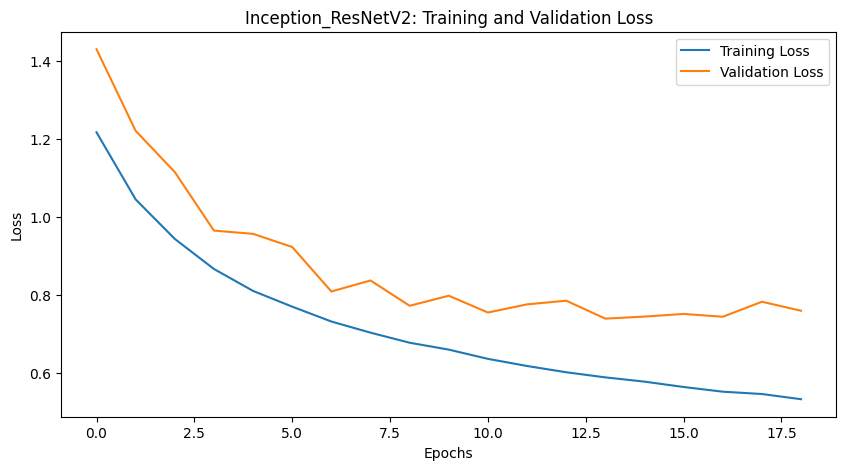

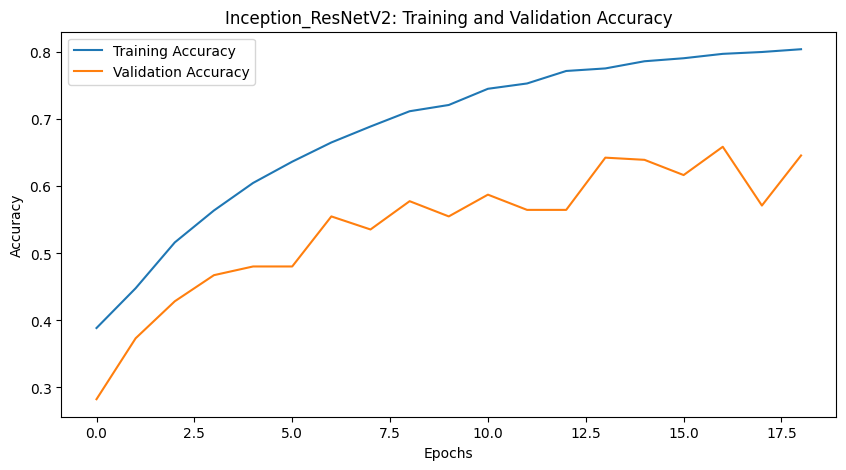

In [ ]:
# Accessing training and validation metrics
training_loss = history.history['loss']
training_accuracy = history.history['accuracy']
validation_loss = history.history['val_loss']
validation_accuracy = history.history['val_accuracy']

# Plotting training loss and validation loss
plt.figure(figsize=(10, 5))
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Inception_ResNetV2: Training and Validation Loss')
plt.legend()
plt.show()

# Plotting training accuracy and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Inception_ResNetV2: Training and Validation Accuracy')
plt.legend()
plt.show()

We store the model

In [ ]:
model_name = 'Inception_ResNetV2'  # Specify the desired model name
save_path = '/content/drive/MyDrive/Models/{}.h5'.format(model_name)    
model.save(save_path)

We predict the test set

In [5]:
# Data generator for the test set
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input
).flow_from_directory(
    test_data_dir,
    target_size=input_shape[:2],
    batch_size=32,
    class_mode='categorical',
    shuffle=False,
    seed=123
)

# Generate predictions for the test set
predictions = model2.predict(test_datagen)

# Convert the predicted probabilities to class labels
predicted_labels = tf.argmax(predictions, axis =1)

# Get the true true labels from the data generator
true_labels = test_datagen.classes

# Convert the predicted labels to numpy format
predicted_labels = predicted_labels.numpy()

# Calculate accuracy and balanced accuracy
accuracy = accuracy_score(true_labels, predicted_labels)
balanced_accuracy = balanced_accuracy_score(true_labels, predicted_labels)

print("Accuracy: ", accuracy)
print("Balanced Accuracy: ", balanced_accuracy)

Found 289 images belonging to 3 classes.
10/10 [==============================] - 100s 9s/step
Accuracy:  0.7577854671280276
Balanced Accuracy:  0.7207791482949154


We compute de balanced accuracy manually

In [6]:
# Compute true positives for class 0
true_positives_class_1 = np.sum((true_labels == 0) & (predicted_labels == 0))
# Compute the number of samples in class 0
num_samples_class_1 = np.sum(true_labels == 0)
# Compute the accuracy for class 0
accuracy_class_mel = true_positives_class_1 / num_samples_class_1

print(accuracy_class_mel)
# Compute true positives for class 0
true_positives_class_1 = np.sum((true_labels == 1) & (predicted_labels == 1))
# Compute the number of samples in class 0
num_samples_class_1 = np.sum(true_labels == 1)
# Compute the accuracy for class 0
accuracy_class_seb = true_positives_class_1 / num_samples_class_1
print(accuracy_class_seb)

# Compute true positives for class 0
true_positives_class_1 = np.sum((true_labels == 2) & (predicted_labels == 2))
# Compute the number of samples in class 0
num_samples_class_1 = np.sum(true_labels == 2)
# Compute the accuracy for class 0
accuracy_class_seb = true_positives_class_1 / num_samples_class_1
print(accuracy_class_seb)

0.775609756097561
0.9130434782608695
0.47368421052631576


We compute the ROC CURVE and the confusion matrix

Class: benign
Specificity: 0.9880952380952381
Sensitivity: 0.775609756097561
AUC: 0.8818524970963996

Class: melanoma
Specificity: 0.7736625514403292
Sensitivity: 0.9130434782608695
AUC: 0.8433530148505994

Class: seborrheic
Specificity: 0.9442231075697212
Sensitivity: 0.47368421052631576
AUC: 0.7089536590480184

Average AUC: 0.8113863903316725


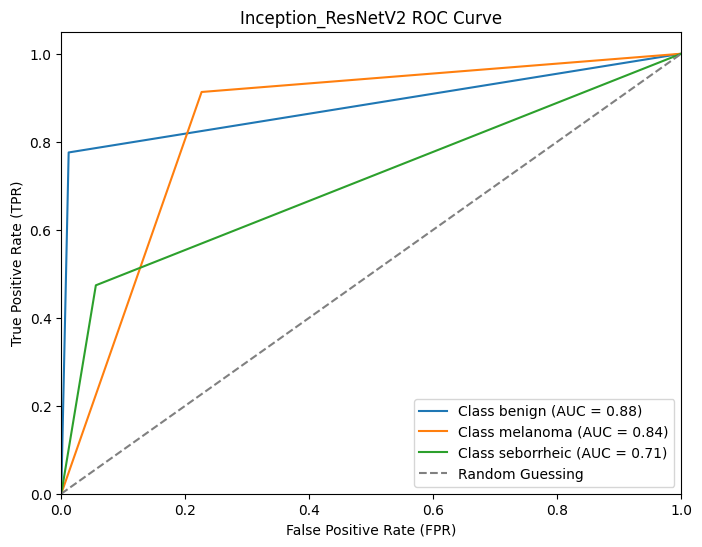

In [7]:
from sklearn.metrics import multilabel_confusion_matrix, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np

# Compute multilabel confusion matrix
mcm = multilabel_confusion_matrix(true_labels, predicted_labels)
classes = ['benign', 'melanoma', 'seborrheic']
auc_scores = []  # List to store AUC scores

plt.figure(figsize=(8, 6))

for class_label in range(3):
    tp = mcm[class_label, 1, 1]
    fp = mcm[class_label, 0, 1]
    fn = mcm[class_label, 1, 0]
    tn = mcm[class_label, 0, 0]

    specificity = tn / (tn + fp)
    sensitivity = tp / (tp + fn)

    binary_true_labels = np.where(np.array(true_labels) == class_label, 1, 0)
    binary_predicted_labels = np.where(np.array(predicted_labels) == class_label, 1, 0)

    # Compute FPR and TPR for each class
    fpr, tpr, _ = roc_curve(binary_true_labels, binary_predicted_labels)
    roc_auc = auc(fpr, tpr)
    auc_scores.append(roc_auc)

    print("Class:", classes[class_label])
    print("Specificity:", specificity)
    print("Sensitivity:", sensitivity)
    print("AUC:", roc_auc)
    print()

    # Plot ROC curve for each class
    plt.plot(fpr, tpr, label='Class ' + classes[class_label] + ' (AUC = {:.2f})'.format(roc_auc))

# Calculate average AUC
average_auc = np.mean(auc_scores)
print("Average AUC:", average_auc)

# Plot random guessing line
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guessing')

# Set plot properties
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Inception_ResNetV2 ROC Curve')
plt.legend(loc='lower right')
plt.show()


We plot the confusion matrix of every class

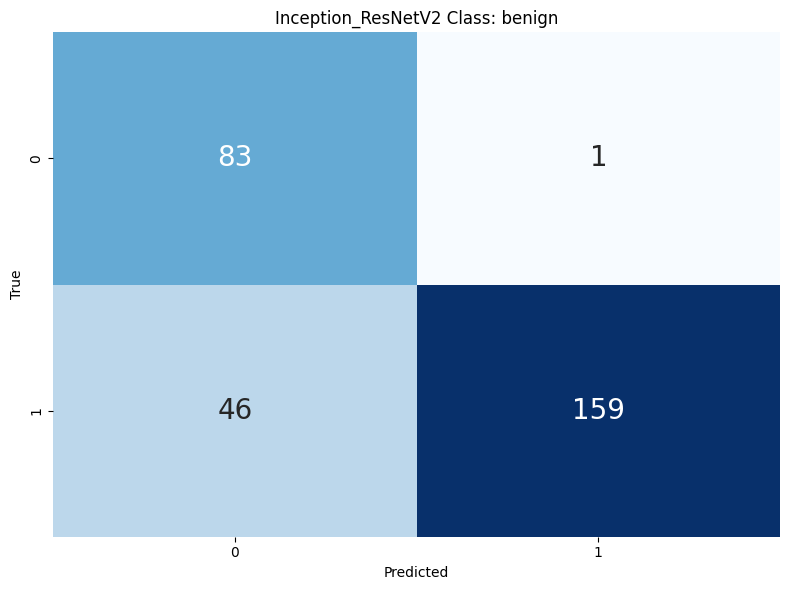

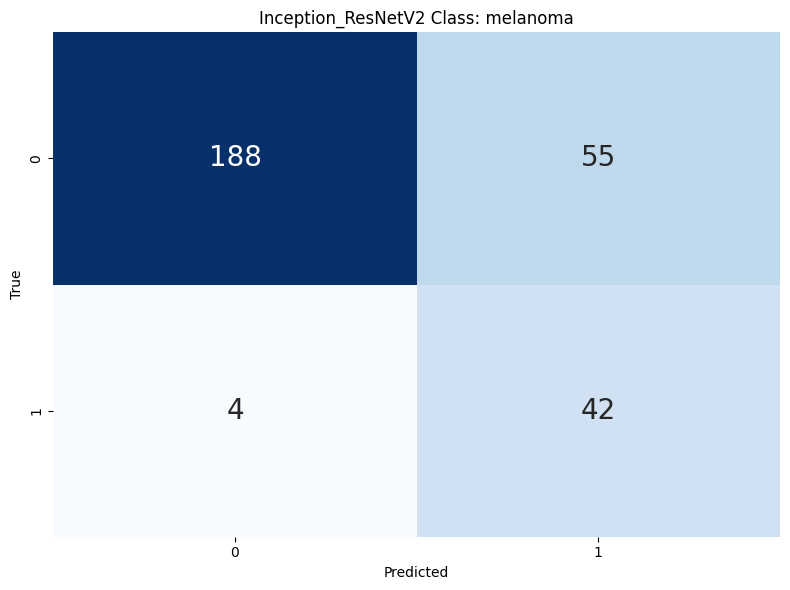

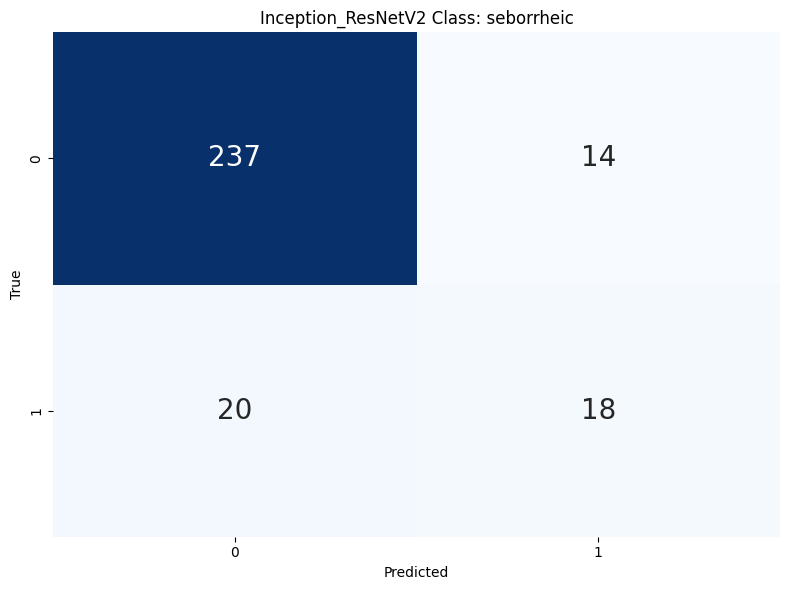

In [8]:
# Iterate over each class and create heatmap
for i, class_label in enumerate(classes):
    # Create a separate plot for each class
    plt.figure(figsize=(8, 6))
    sns.heatmap(mcm[i], annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 20})
    plt.title('Inception_ResNetV2 Class: ' + class_label)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.tight_layout()
    plt.show()